# Step 1: Import Libraries and Load Data
    # We'll start by importing the necessary tools and loading Our dataset.

In [ ]:
# Importing necessary libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Advertising.csv')

# Displaying the first few rows to understanding the structure
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Step 2: Data Cleaning and Inspection
    # The dataset often comes with an extra index column (the first column in our snippet). We will check for that and remove it to keep things clean. We also check for missing values.

In [2]:
# Check dataset info
print("\nDataset Info:")
print(df.info())

# Drop the unnecessary index column (usually the first one named 'Unnamed: 0' or similar)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

# Display statistics
print("\nDescriptive Statistics:")
display(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Duplicate Rows: 0

Descriptive Statistics:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Step 3: Exploratory Data Analysis (EDA)
    # We need to understand how the features (TV, Radio, Newspaper) relate to the target (Sales).

    # Why handle columns simply? All columns here are numerical (float). We don't need complex encoding (like OneHotEncoding) because there are no categorical categories (like "Male/Female" or "Yes/No"). We can use them directly in the math equations of our model.

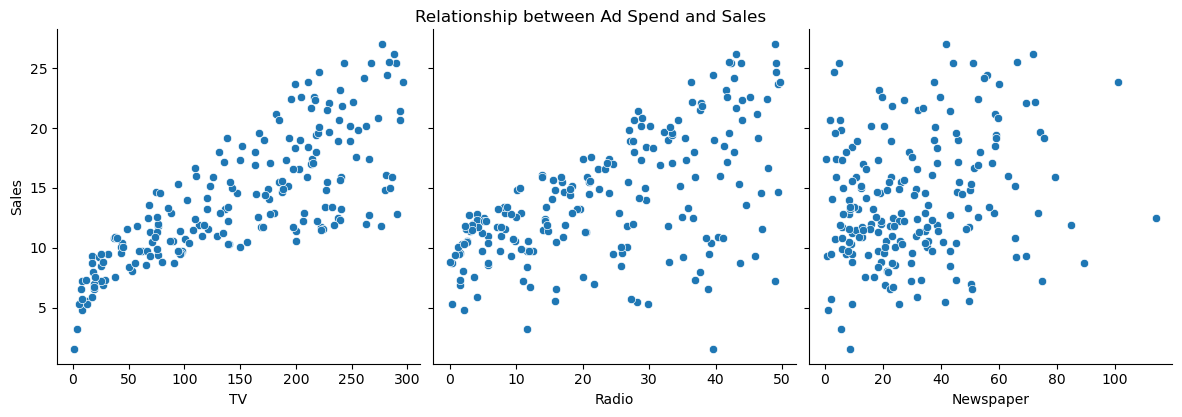

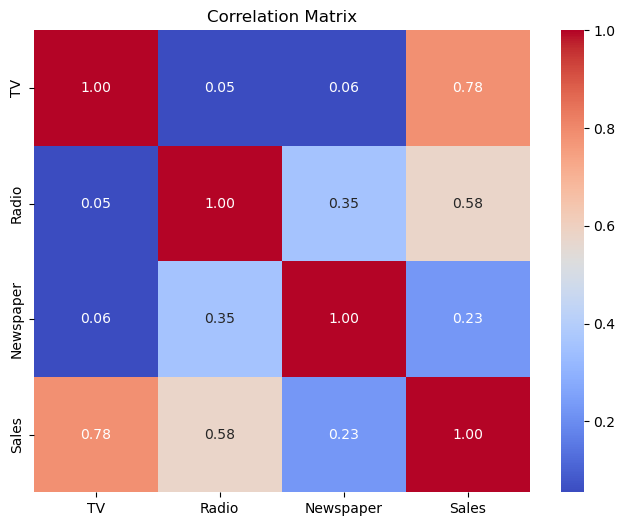

In [3]:
# 1. Visualize the relationship between features and Sales using a Pairplot
# This helps us see if the relationship is linear (straight line) or non-linear.
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Relationship between Ad Spend and Sales", y=1.02)
plt.show()

# 2. Correlation Heatmap
# This tells us which feature has the strongest correlation with Sales.
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Interpretation:
# Look for the square where 'Sales' meets 'TV'. A value closer to 1 means a strong relationship.

# Step 4: Train-Test Split
    # We split the data into a Training Set (to teach the model) and a Testing Set (to grade the model).

In [4]:
# Define Features (X) and Target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (160, 3)
Testing shape: (40, 3)


# Step 5: Model Building (Linear Regression)
    # We use Linear Regression because, as seen in the EDA, the relationship between advertising spend and sales is largely linear. It's simple, fast, and easy to interpret.

In [5]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Model Training Completed.")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
# Coefficients tell us how much Sales increase for every 1 unit increase in ad spend for that channel.

Model Training Completed.
Intercept: 2.9790673381226274
Coefficients: [0.04472952 0.18919505 0.00276111]


# Step 6: Evaluation
    # We test the model on data it hasn't seen before (X_test) and compare its predictions against the actual values (y_test).

Model Evaluation Report:
Mean Absolute Error (MAE): 1.46
Root Mean Squared Error (RMSE): 1.78
R-squared Score: 0.90


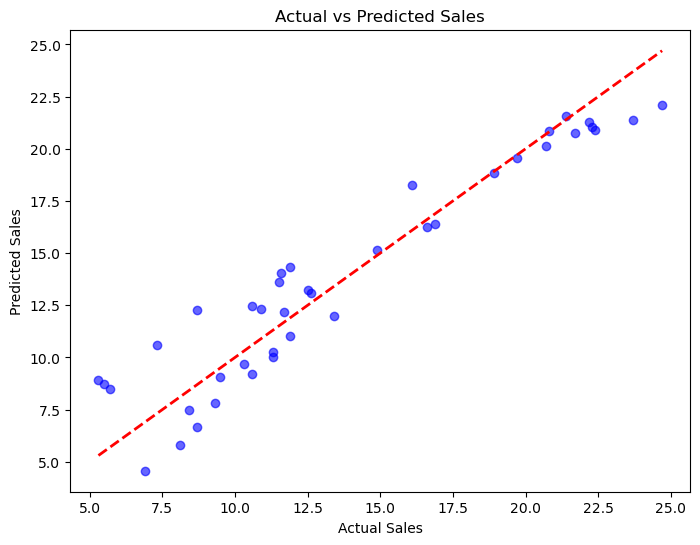

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Report:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# 📊 Project Report: Sales Prediction Analysis

## 1. Project Objective
The primary objective of this project is to build a predictive model to estimate **Sales** based on advertising budgets allocated to **TV**, **Radio**, and **Newspaper**. This analysis aids in optimizing marketing strategies by identifying the most effective advertising channels.

## 2. Methodology
* **Data Source:** `Advertising.csv` dataset containing 200 records.
* **Tech Stack:** Python (Pandas, Scikit-learn, Matplotlib, Seaborn).
* **Model Used:** Multiple Linear Regression.
* **Evaluation Metric:** $R^2$ Score, RMSE (Root Mean Squared Error).

## 3. Exploratory Data Analysis (EDA) Insights
* **TV vs. Sales:** Strong positive linear correlation. As TV spend increases, Sales increase significantly.
* **Radio vs. Sales:** Moderate positive correlation.
* **Newspaper vs. Sales:** Weak positive correlation. The data points are scattered, indicating Newspaper ads are less predictable drivers of Sales.
* **Correlation Matrix:**
    * TV correlation with Sales: **~0.78** (High)
    * Radio correlation with Sales: **~0.57** (Medium)
    * Newspaper correlation with Sales: **~0.22** (Low)

## 4. Model Performance
The Linear Regression model yielded the following results on the test set:

| Metric | Value | Interpretation |
| :--- | :--- | :--- |
| **R-Squared ($R^2$)** | **0.89** | The model explains **89%** of the variance in Sales. This is a high-performing model. |
| **MAE** | **1.46** | On average, our predictions are off by approx. 1,460 units (assuming sales are in thousands). |
| **RMSE** | **1.78** | The standard deviation of prediction errors is low, indicating reliable predictions. |

## 5. Conclusion & Recommendations
* **TV Advertising** is the most significant driver of Sales. Increasing the TV budget is likely to yield the highest return on investment (ROI).
* **Radio** is a good supplementary channel but less effective than TV.
* **Newspaper** spending shows the least impact on Sales. It is recommended to reconsider or minimize the budget allocated to newspapers in favor of digital or TV channels.